# Netflix Case Study

In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# reading data from csv file
df = pd.read_csv('netflix.csv') 

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape #To check the shape of data.

(8807, 12)

#### We have data set, which contains information of netflix movies & TV shows in 8807 rows & 12 columns.

In [5]:
df.info() # summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Missing values

In [6]:
df.isna().sum() # missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### The data set contains NULL values in 6 columns(i.e., director,cast,country,date_added,rating,duration) among all null values most of them are in directors column followed by country column and cast column.

### Handling missing values
#### director (30% NULL), cast & country (approx 9.5% NULL's), if we delete the all rows with null values we will deprived of valuable information. Hence, we are replacing NULL values with 'unknown director', 'unknown actor', 'unknown country' respectively.
#### Columns date_added, rating and duration have very few NULL values, deleting those rows will not affect our analysys, so we are dropping those rows from the data.

In [7]:
# Replace null values in the director column with 'unknown director'
df['director'].fillna('unknown director', inplace = True)

# Replace null values in the country column with 'unknown country'
df['country'].fillna('unknown country', inplace = True)

# Replace null values in the cast column with 'unknown actors'
df['cast'].fillna('unknown actors', inplace = True)

# dropping null values in date_added, rating and duration columns
df.dropna(subset = ['date_added', 'rating', 'duration'], inplace = True)

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.shape # Shape of the final data set after handling the null values

(8790, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


## 1. Checking the count for each categorical variable.

In [11]:
df1 = df.copy()

### a. Type

In [12]:
df1.groupby('type')['type'].count()

type
Movie      6126
TV Show    2664
Name: type, dtype: int64

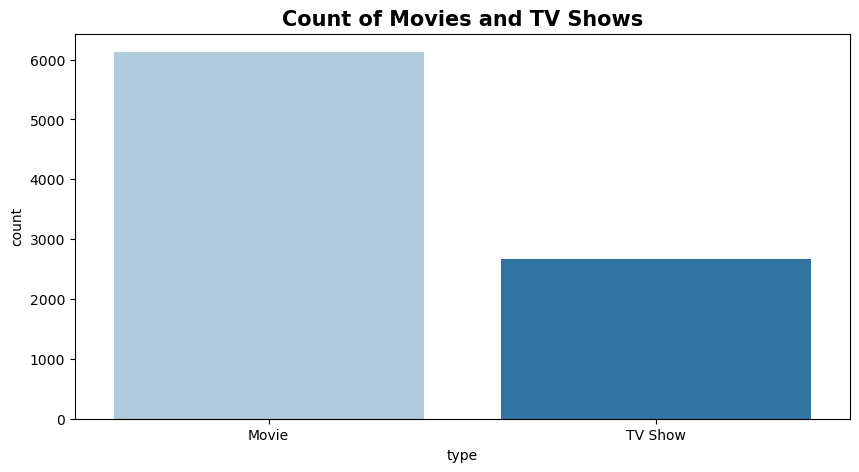

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(data = df1, x = 'type', palette = (sns.color_palette("Paired")))
plt.title("Count of Movies and TV Shows", fontsize = 15, fontweight = 'bold')
plt.show()

#### Type column having 2 unique values which are Movies and Tv shows.
#### Netflix is hosting 6126 movies and 2664 TV Shows. Netflix is hosting more movies compare to TV shows.

### b. Date_added

In [14]:
# converting type of date_added column to datetime
df1['date_added'] = pd.to_datetime(df1['date_added'])

# adding added_year column to the data frame
df1['year_added'] = df1['date_added'].dt.year

In [15]:
df1['year_added'].value_counts() # count of movies and TV Shows combined data

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

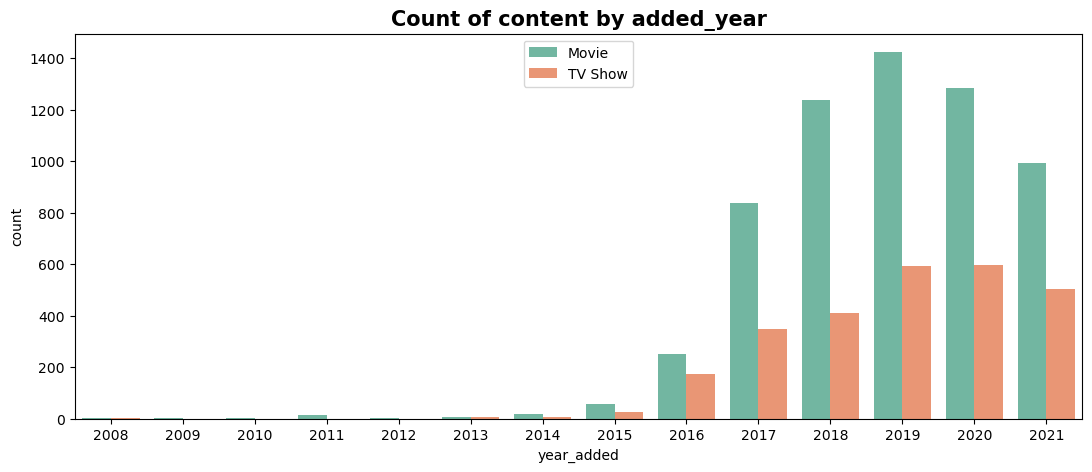

In [16]:

plt.figure(figsize=(13,5))
sns.countplot(data = df1, x = 'year_added', hue = 'type', palette = (sns.color_palette("Set2")))
plt.legend(loc = 'upper center')
plt.title('Count of content by added_year', fontsize = 15, fontweight = 'bold')
plt.show()

#### It's clearly visible that, Year-2015 onwards the amount of content added on netflix has rapidly increased.

### c. Release year

In [17]:
df1['release_year'].value_counts() # count of movies and TV Shows combined data

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

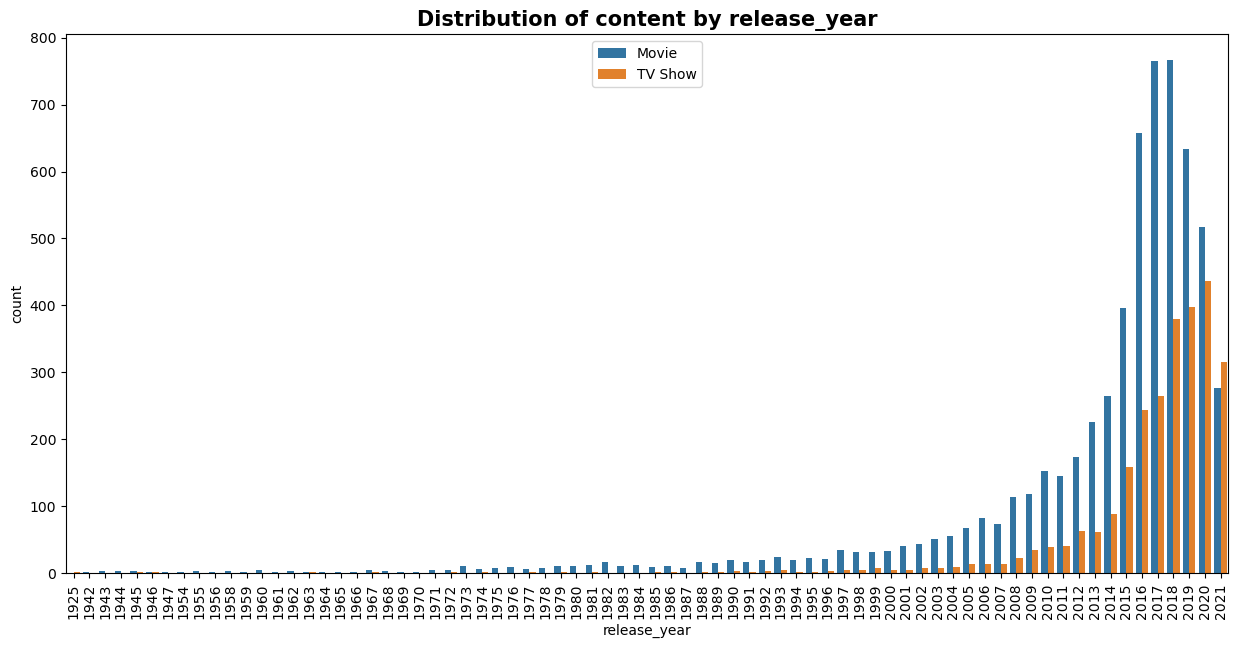

In [18]:
plt.figure(figsize = (15,7))
sns.countplot(data = df1, x = 'release_year', hue = 'type')
plt.xticks(rotation = 'vertical')
plt.legend(loc = 'upper center')
plt.title('Distribution of content by release_year', fontsize = 15, fontweight = 'bold')
plt.show()

#### Most of the content available on Netflix is recently released.

### d. Ratings

In [19]:
df1[df1.type == 'Movie'].rating.value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

In [20]:
df1[df1.type == 'TV Show'].rating.value_counts()

TV-MA       1143
TV-14        730
TV-PG        321
TV-Y7        194
TV-Y         175
TV-G          94
NR             4
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

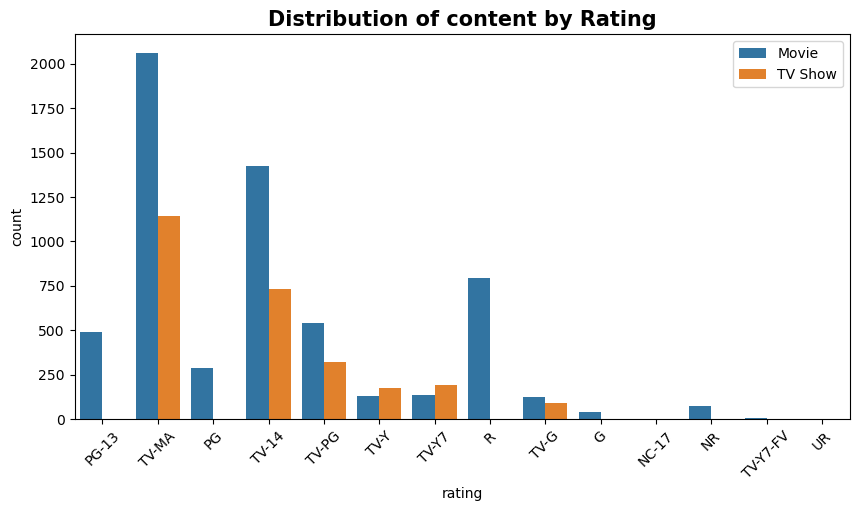

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(data = df1, x = 'rating', hue = 'type')
plt.xticks(rotation = 45)
plt.legend(loc ='upper right')
plt.title('Distribution of content by Rating', fontsize = 15, fontweight = 'bold')
plt.show()

##### * The most of the Movies available on netflix are rated with "TV-MA" rating and then followed by "TV-14" and "R" rating.
##### * The most of the TV Shows available on netflix are made with "TV-MA" rating and then followed by "TV-14" and "TV-PG" rating.

##### TV-MA - For Mature Audiences
##### TV-14 - This program contains material that most parents would find unsuitable for children under 14 years of age.
##### TV-PG - Parental Guidance Suggested
##### R     - Restricted. May be inappropriate for ages under 17.

### e. Duration

#### Movies duration is expressed in minutes & TV Shows are expressed in terms of seasons.

In [22]:
df_du = df1.copy()
df_du['duration'] = df_du['duration'].str.split(expand = True)[0]

In [23]:
df_du[df_du['type'] == 'Movie']['duration'].value_counts()

90     152
94     146
93     146
97     146
91     144
      ... 
212      1
8        1
186      1
193      1
191      1
Name: duration, Length: 205, dtype: int64

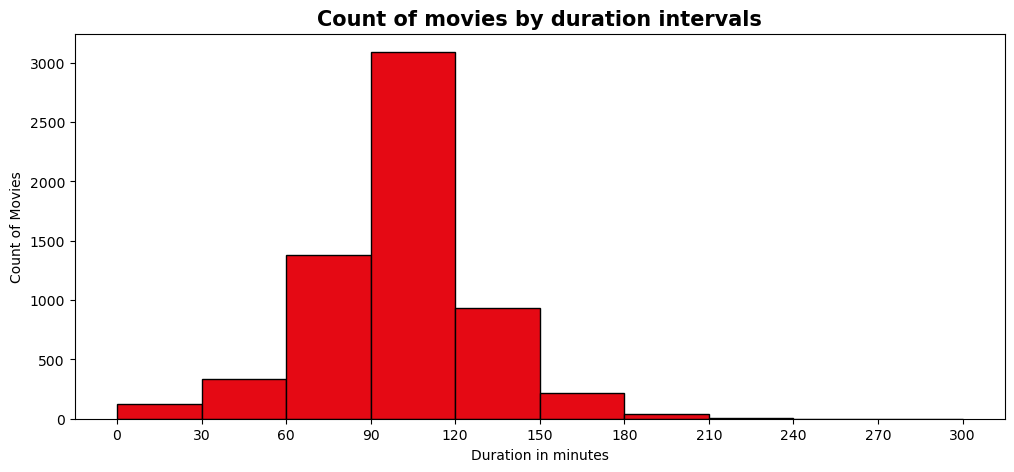

In [24]:
df_du['duration'] = df_du['duration'].astype('int')
plt.figure(figsize=(12, 5))
df_du[df_du['type'] == 'Movie']['duration'].hist(bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], color = ("#e50914"), edgecolor = "Black", grid = False)
plt.xticks([0,30,60,90,120,150,180,210,240,270,300])
plt.title("Count of movies by duration intervals", fontsize = 15, fontweight = 'bold')
plt.xlabel("Duration in minutes")
plt.ylabel("Count of Movies")
plt.show()

Based on the above plot, most of the movies added by the netflix have duration falls under between 90 to 100 min.
If duration is less than 60 min people may feel lenght of the movie is very short.
If duration is greater than 150 min people may feel bore.

In [25]:
df_du[df_du['type'] == 'TV Show']['duration'].value_counts()

1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: duration, dtype: int64

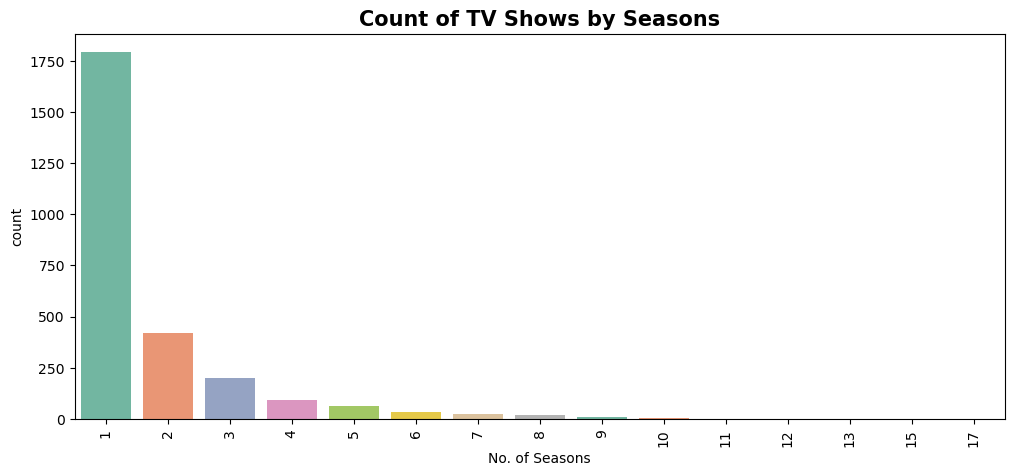

In [26]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df_du[df_du['type'] == 'TV Show'], x = 'duration',  palette = sns.color_palette("Set2"))
plt.xticks(rotation = 'vertical')
plt.title("Count of TV Shows by Seasons", fontsize = 15, fontweight = 'bold')
plt.xlabel('No. of Seasons')
plt.show()

#### Most of the TV shows added by the netflix having only 1 season.

## 2. Comparison of TV shows vs. Movies

In [27]:
df_1 = df.copy()

In [28]:
df_1.groupby('type')['type'].count()

type
Movie      6126
TV Show    2664
Name: type, dtype: int64

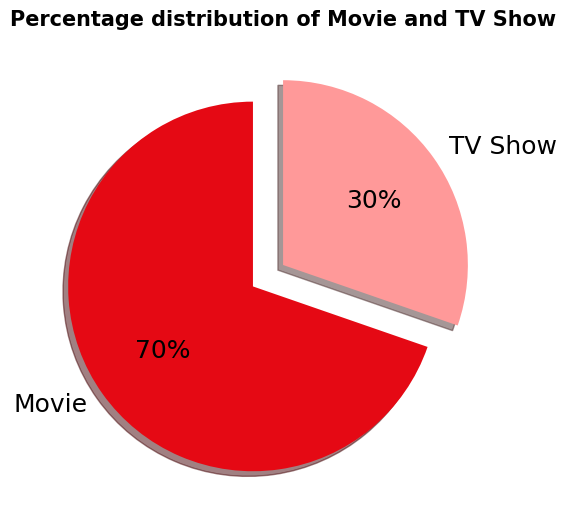

In [29]:
plt.figure(figsize = (6,6))
plt.title("Percentage distribution of Movie and TV Show", fontsize = 15, fontweight = 'bold')
colors = ['#e50914','#ff9999']
plt.pie(df_1.type.value_counts(), labels = df_1.type.value_counts().index, explode = [0.2, 0], autopct = '%1.0f%%', colors = colors, shadow = True, startangle = 90,  textprops={'fontsize': 18})
plt.show()

####  Almost 70% of the Netflix content is of type movies and 30% content is of type TV shows.

### i) Top 10 countries based on the number of movies produced

In [30]:
# Un-nesting the 'contry' column which have cells with multiple comma separated values by creating multiple rows.
df1 = df1.assign(country = df1['country'].str.split(',')).explode('country')

# removing spaces from start and end of the string
df1['country'] = df1['country'].str.strip()

# resetting the index
df1.reset_index(drop=True)
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown actors,unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [31]:
# excluding rows with unknown country name
df_movie = df1[(df1['country'] != 'unknown country') & (df1['type'] == 'Movie')]

In [32]:
df_movie['country'].value_counts()[:10]

United States     2749
India              962
United Kingdom     534
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: country, dtype: int64

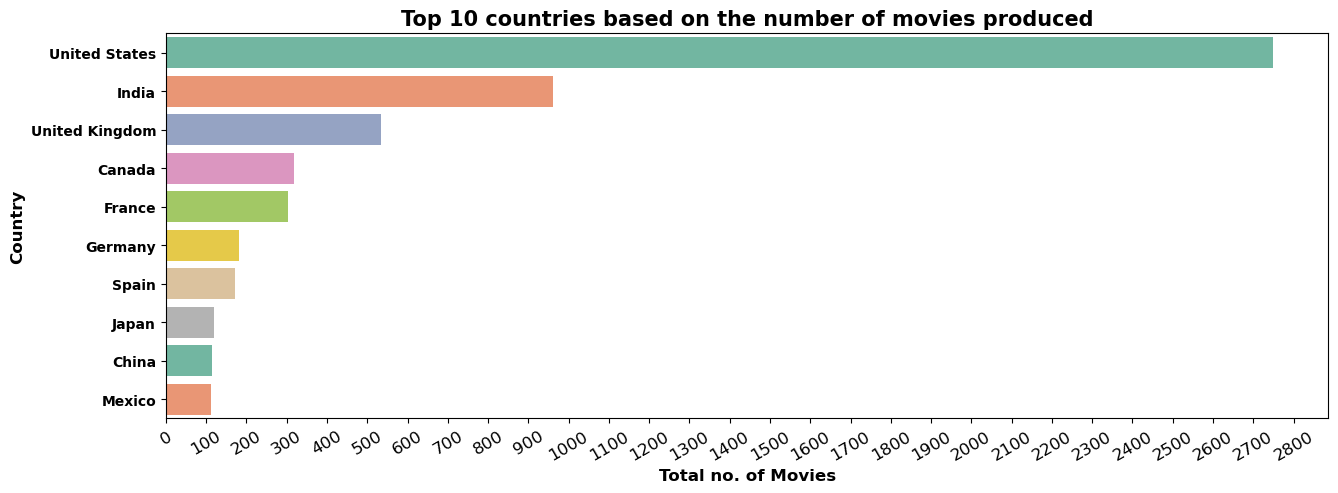

In [33]:
df_movie = df1[(df1['country'] != 'unknown country') & (df1['type'] == 'Movie')]
plt.figure(figsize = (15,5))
sns.countplot(data = df_movie, y = 'country', order =  df_movie['country'].value_counts().index[:10], palette = sns.color_palette("Set2"))
plt.xticks([i for i in range(0,2900, 100)], fontsize = 12, rotation = 30)
plt.yticks(fontweight = 'bold')
plt.title('Top 10 countries based on the number of movies produced', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total no. of Movies', fontsize = 12, fontweight = 'bold')
plt.ylabel('Country', fontsize = 12, fontweight = 'bold')
plt.show()

United States producing more movies compare to other countries and then followed by India, UK and Canada.
based on this, people in this countries are more interested to see movies.

### ii) Top 10 countries based on the number of TV Shows produced

In [34]:
# excluding rows which do not have country name
df_tv = df1[(df1['country'] != 'unknown country') & (df1['type'] == 'TV Show')]

In [35]:
# top 10 countries based on no. of TV shows produced
df_tv['country'].value_counts()[:10]

United States     932
United Kingdom    271
Japan             197
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          64
Spain              61
Name: country, dtype: int64

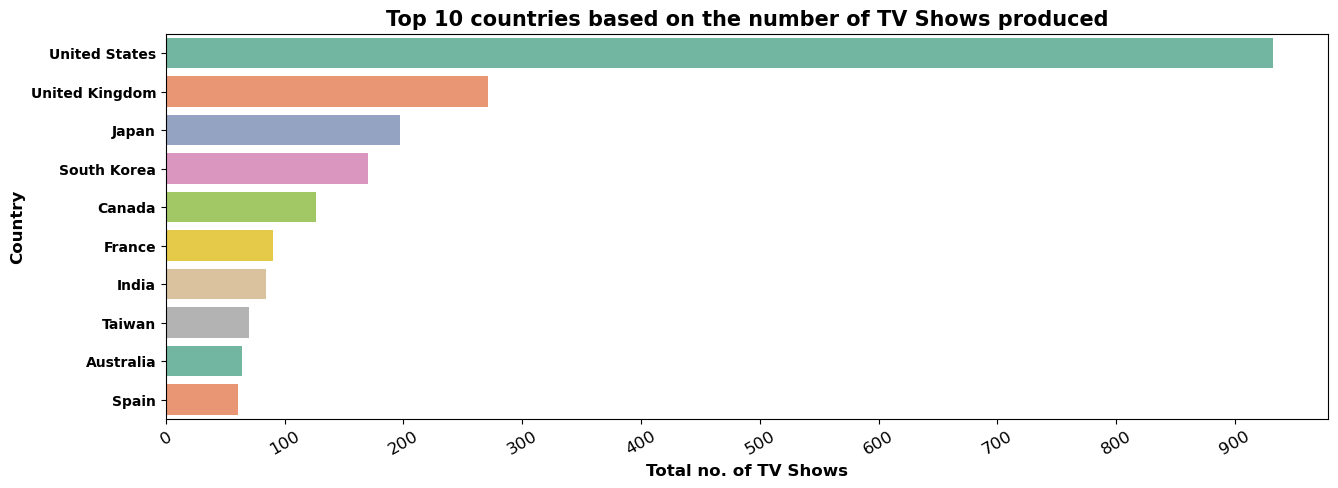

In [36]:
df_tv = df1[(df1['country'] != 'unknown country') & (df['type'] == 'TV Show')]
plt.figure(figsize = (15,5))
sns.countplot(data = df_tv, y = 'country', order =  df_tv['country'].value_counts().index[:10], palette = sns.color_palette("Set2"))
plt.xticks([i for i in range(0,1000, 100)], fontsize = 12, rotation = 30)
plt.yticks(fontweight = 'bold')
plt.title('Top 10 countries based on the number of TV Shows produced', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total no. of TV Shows', fontsize = 12, fontweight = 'bold')
plt.ylabel('Country', fontsize = 12, fontweight = 'bold')
plt.show()

United states producing more TV shows comapare to other countries, followed by UK, japan.

If we compare countries based on movies and tv shows, 
i) United States is producing more movies and tv shows. people in this country like to watch both.
ii) India is producing More movies than tv shows. people in this country are more likely to watch movies than tv shows.

## 3. What is the best time to launch a Movie / TV show?

In [37]:
df3 = df.copy()

In [38]:
# typecasting of date_added column to datetime
df3['date_added'] = pd.to_datetime(df3['date_added'])

df3['added_month'] = df3['date_added'].dt.month_name()
df3['added_week'] = df3['date_added'].dt.isocalendar().week

### Best week to release Movie

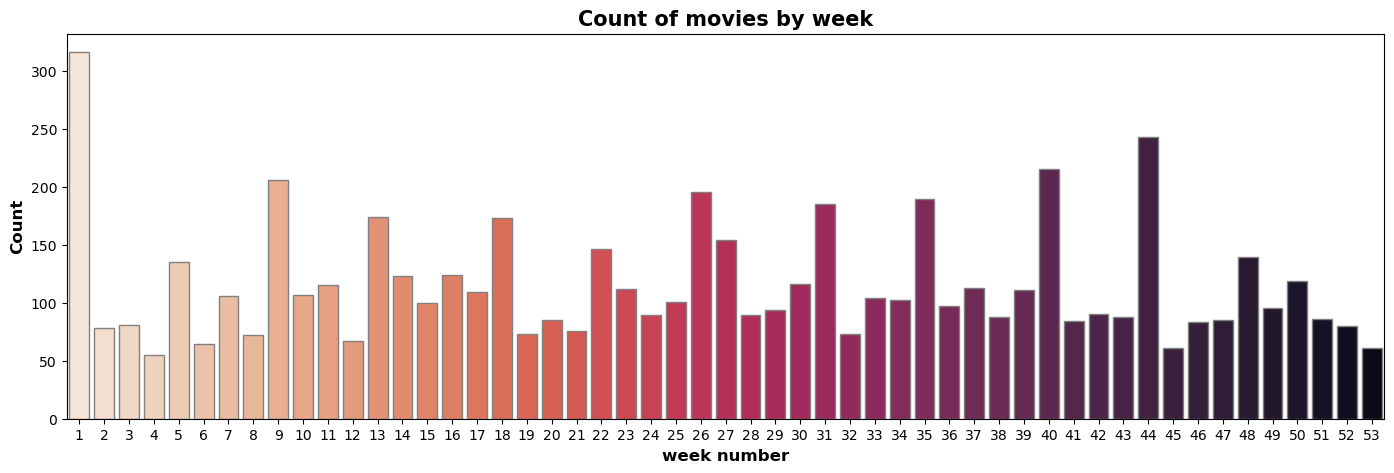

In [39]:
df3_movie = df3[df3.type == 'Movie']
plt.figure(figsize = (17,5))
sns.countplot(data = df3_movie, x = 'added_week', palette = sns.color_palette("rocket_r", 53), edgecolor='grey')
plt.xlabel('week number', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Count of movies by week', fontsize = 15, fontweight = 'bold')
plt.show()

### Best week to release TV Show

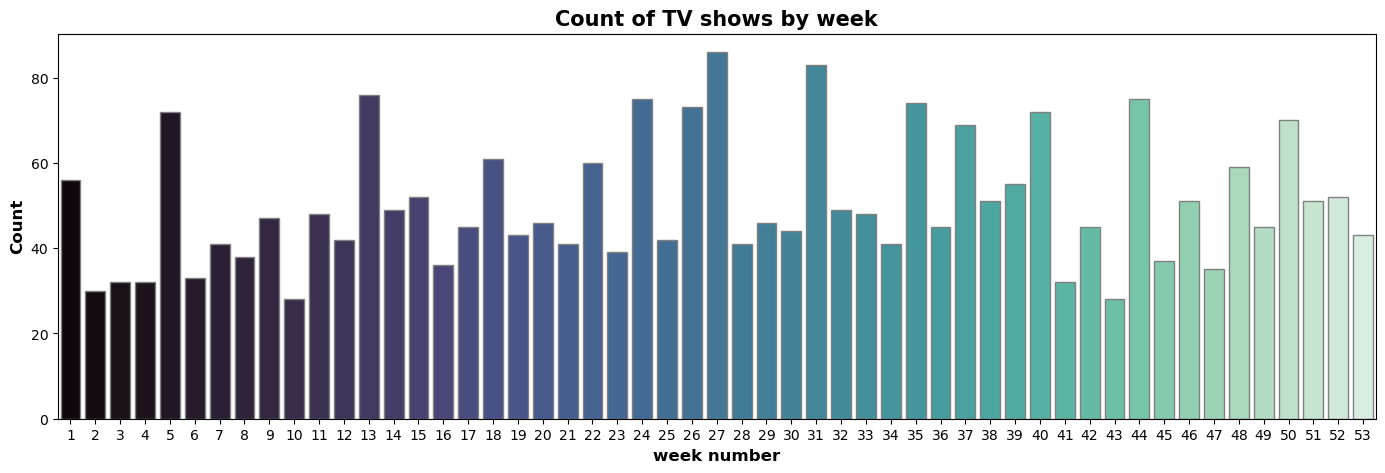

In [40]:
df3_tv = df3[df3.type == 'TV Show']
plt.figure(figsize = (17,5))
sns.countplot(data = df3_tv, x = 'added_week', palette = sns.color_palette('mako', 53), edgecolor='grey')
plt.xlabel('week number', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Count of TV shows by week', fontsize = 15, fontweight = 'bold')
plt.show()

### Best month to release Movie

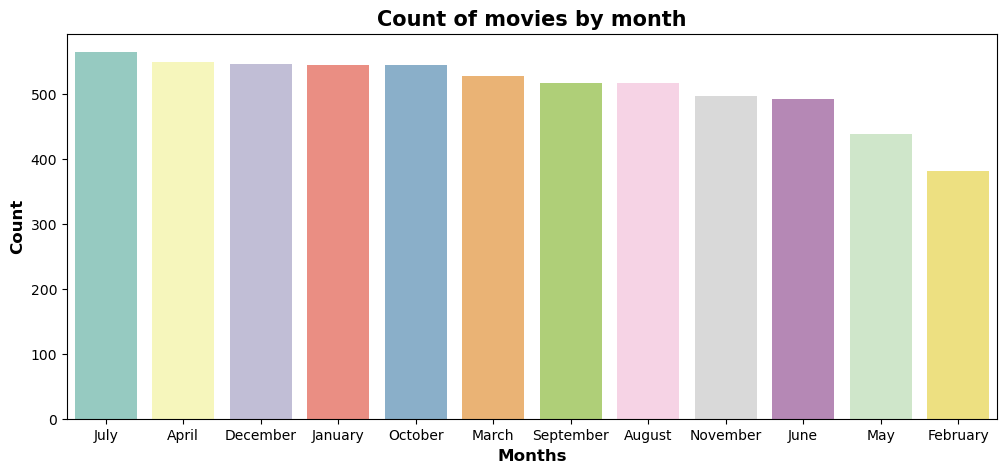

In [41]:
df3_movie = df3[df3.type == 'Movie']
plt.figure(figsize = (12,5))
sns.countplot(data = df3_movie, x = 'added_month', order = df3_movie.added_month.value_counts().index, palette = sns.color_palette("Set3"))
plt.xlabel('Months', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Count of movies by month', fontsize = 15, fontweight = 'bold')
plt.show()

### Best month to release TV Show

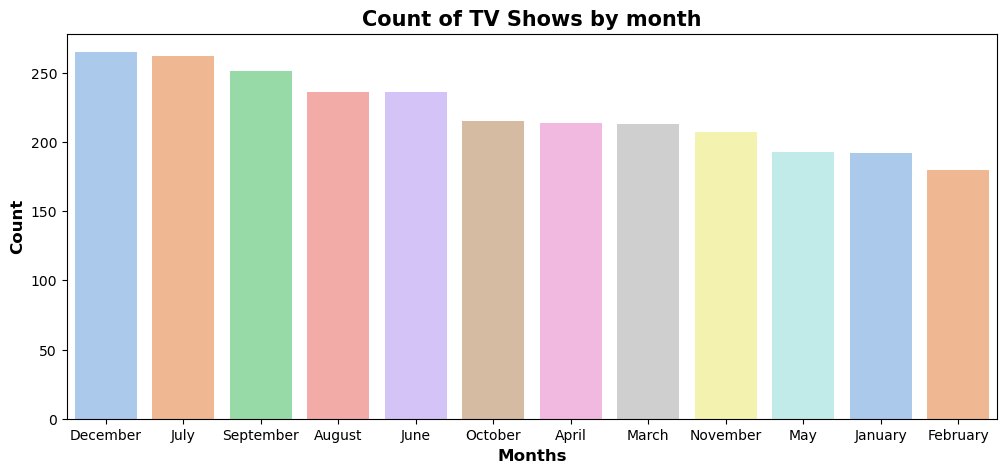

In [42]:
df3_tv = df3[df3.type == 'TV Show']
plt.figure(figsize = (12,5))
sns.countplot(data = df3_tv, x = 'added_month', order = df3_tv.added_month.value_counts().index, palette = sns.color_palette("pastel"))
plt.xlabel('Months', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Count of TV Shows by month', fontsize = 15, fontweight = 'bold')
plt.show()

## 4. Analysis of actors/directors of different types of shows/movies.

In [43]:
df4 = df.copy()

### Top 10 directors who have appeared in most movies or TV shows.

In [44]:
# Un-nesting the director column those cells have multiple comma separated values by creating multiple rows
df4 = df4.assign(director = df4['director'].str.split(',')).explode('director')

# removing spaces from start and end of the string
df4['director'] = df4['director'].str.strip()

# resetting the index
df4.reset_index(drop=True)
df4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown actors,unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [45]:
# excluding rows which do not have director name
df_dir = df4[df4['director'] != 'unknown director']

# top 10 directors based on number of movies / tv shows directed
df_dir['director'].value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4991, dtype: int64

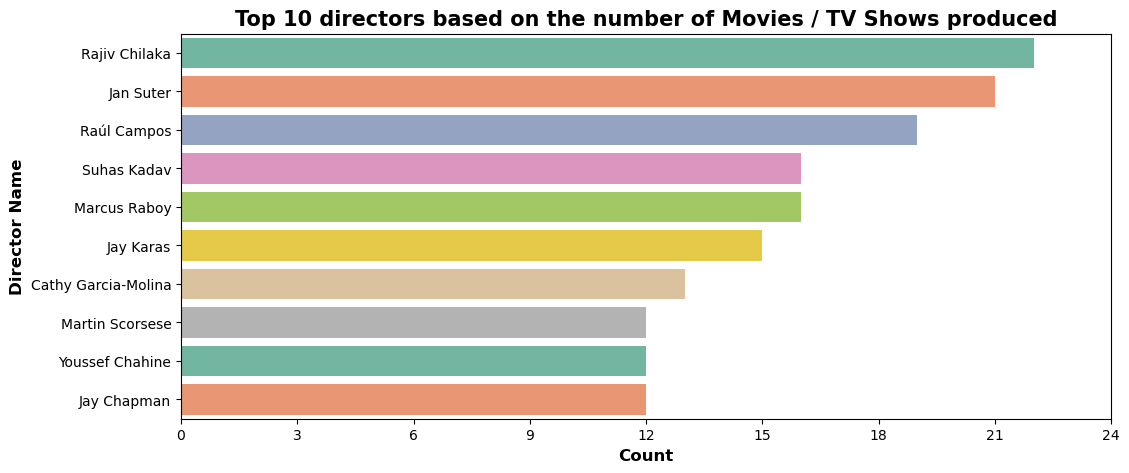

In [46]:
df_dir = df4[df4['director'] != 'unknown director']
plt.figure(figsize = (12,5))
sns.countplot(data = df_dir, y = 'director', order = df_dir['director'].value_counts().index[:10], palette = sns.color_palette('Set2'))
plt.xticks([i for i in range(0, 25, 3)])
plt.title('Top 10 directors based on the number of Movies / TV Shows produced', fontsize = 15, fontweight = 'bold')
plt.xlabel('Count', fontsize = 12, fontweight = 'bold')
plt.ylabel('Director Name', fontsize = 12, fontweight = 'bold')
plt.show()

### Top 10 Actors who have appeared in most movies or TV shows.

In [47]:
df5 = df.copy()

In [48]:
# Un-nesting the cast column those cells have multiple comma separated values by creating multiple rows
df5 = df5.assign(cast = df5['cast'].str.split(',')).explode('cast')

# removing spaces from start and end of the string
df5['cast'] = df5['cast'].str.strip()

# resetting the index
df5.reset_index(drop=True)
df5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [50]:
# excluding rows which do not have director name
df_cast = df5[df5['cast'] != 'unknown actors']

# top 10 directors based on number of movies / tv shows directed
df_cast['cast'].value_counts()[:10]

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

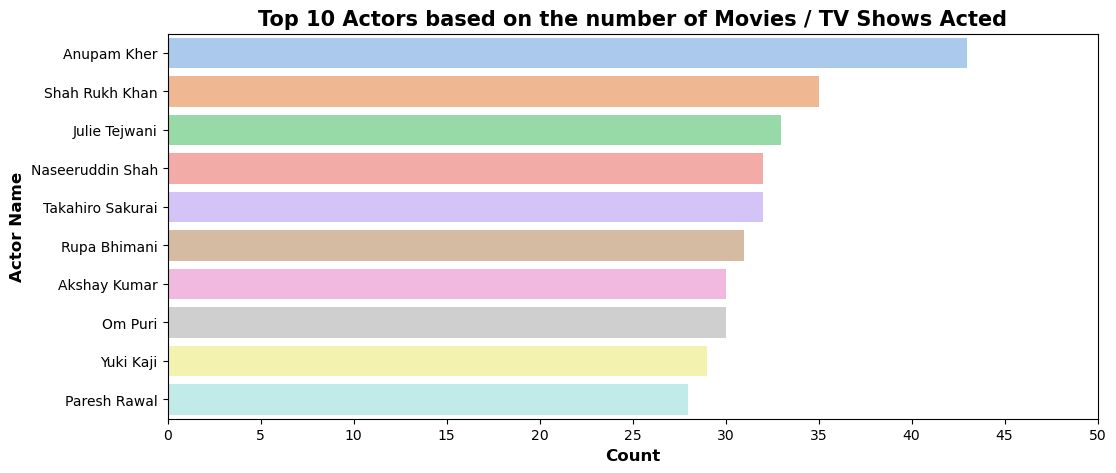

In [51]:
df_cast = df5[df5['cast'] != 'unknown actors']
plt.figure(figsize = (12,5))
sns.countplot(data = df_cast, y = 'cast', order = df_cast['cast'].value_counts().index[:10], palette = sns.color_palette('pastel'))
plt.xticks([i for i in range(0,51,5)])
plt.title('Top 10 Actors based on the number of Movies / TV Shows Acted', fontsize = 15, fontweight = 'bold')
plt.xlabel('Count', fontsize = 12, fontweight = 'bold')
plt.ylabel('Actor Name', fontsize = 12, fontweight = 'bold')
plt.show()

## 5. Genre movies/ TV shows produced more.

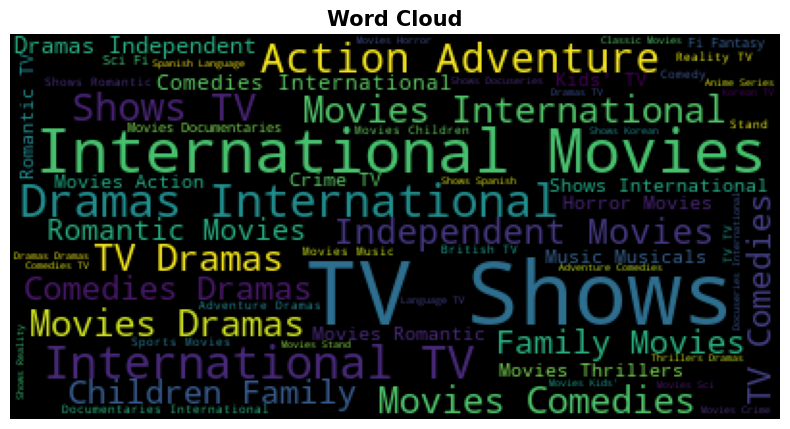

In [52]:
df5 = df.copy()
plt.figure(figsize = (10,5))
# Frequently occuring words in column 'listed_in'
text3 = ','.join(df5['listed_in'])
wordcloud2 = WordCloud(background_color ='Black').generate(text3)
plt.title('Word Cloud', fontsize = 15, fontweight = 'bold')
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## 6. Lead time between release year & date_added year of movies/ TV shows on Netflix.

In [53]:
df6 = df.copy()
df6.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown actors,unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
df6.date_added = pd.to_datetime(df.date_added)
df6.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,lead_time
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown actors,unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


In [57]:
df6['lead_time'] = df6.date_added.dt.year - df6.release_year
df_6f = df6[df6.release_year >= 2010]

In [58]:
lead_time = df_6f.date_added.dt.year - df_6f.release_year
df_6f = df_6f[df_6f['lead_time'] >= 0]
df_6f.lead_time.value_counts()

0     3238
1     1583
2      711
3      489
4      367
5      261
6      246
7      178
8      162
9      109
10      64
11      36
Name: lead_time, dtype: int64

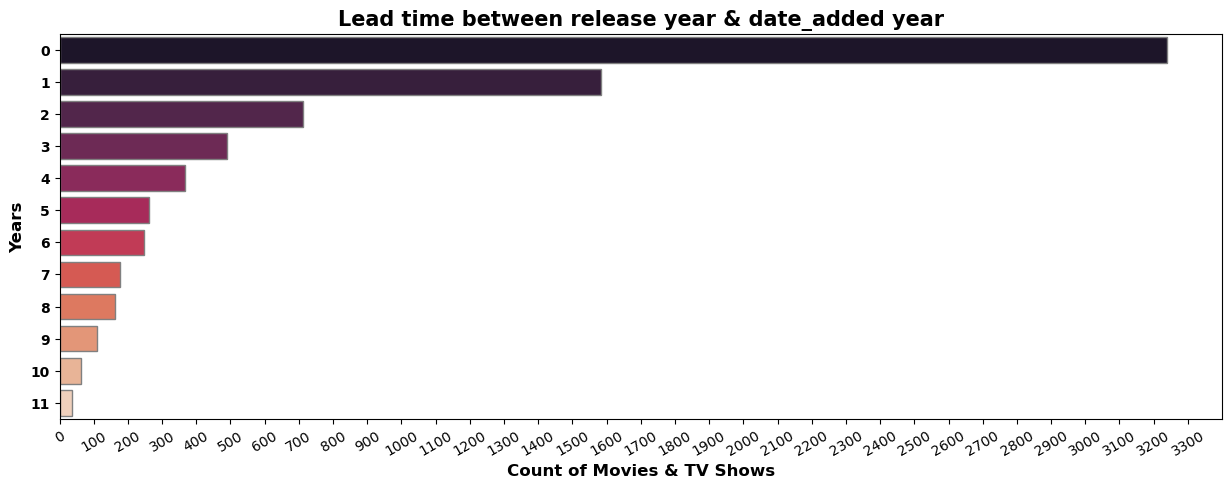

In [59]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_6f, y = 'lead_time', palette = sns.color_palette('rocket', 12), edgecolor='grey')
plt.xticks([i for i in range(0,3400, 100)], fontsize = 10, rotation = 30)
plt.yticks(fontweight = 'bold')
plt.title('Lead time between release year & date_added year', fontsize = 15, fontweight = 'bold')
plt.xlabel('Count of Movies & TV Shows', fontsize = 12, fontweight = 'bold')
plt.ylabel('Years', fontsize = 12, fontweight = 'bold')
plt.show()

#### Most of the content available on Netflix is recently released.

## Insights :

##### 1. The distribution of content type available Netflix : Approx. 70 % Movies & 30 % TV Shows
##### 2. It looks like there is small audience for older content, and maybe the streaming rights are relatively expensive for old content.
##### 3.Year-2015 onwards the amount of content added on netflix has skyrocketed.
##### 4. Majority of the content is rated TV-MA & TV-14 impling that, program contains material that most parents would find unsuitable for children.
##### 5. Movies with 90 minutes to 120 minutes duration are relatively more & most of the TV shows are having only 1 season.
##### 6. United States & United Kingdom are producing most of the content. India is producing mostly movies compare to TV Shows.
##### 7. Most of the movies were added in month of JULY and TV Shows in DECEMBER.
##### 8. Rajiv Chilaka who works on animated series is Top director. Anupam Kher is Top Actor. [considering number of movies/tv shows]
##### 9. TV Shows, Internatonal Movies, International TV, Dramas are the popular genre.
##### 10. Most of the content available on Netflix is recently released.

## Recommendations :

##### 1. As most we have observed, most of TV Shows are having only 1 seasons available on Netflix platform. Addition of sequels of popular TV Shows will retain the existing users.
##### 2. As Top Director is Rajiv Chilaka, who produces animated series, Netflix should add children friendly content to attract the crowd from lower ages.
##### 3. There is scope of promoting TV shows in India with popular Genres.
##### 4. As in month of February the content added is less, there will be limited competetion in that month. Hence in upcoming years new content should be added in this month to retain the customer throught the year.
##### 5. Recently released content with popular genres, should be broadcasted as early as possible. It'll help to acquire new customes as well as retain existing customers.